In [133]:
import copy
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import functions
from node2vec import Node2Vec

# data process
output_path = "C:\\Users\\HanLi\\Desktop\\Arch_Research\\Ecadia\\GNN\\pre_processed_data"
room_type_dict = {'LivingRoom':0, 'Bedroom':1, 'Kitchen':2, 'Dining':3, 'Bath':4, 'Storage':5, 'Entry':6, 'Garage':7, 'Other':8, 'Outdoor':9}
room_type = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Entry', 'Garage', 'Other', 'Outdoor']
Gs = []
for i in range (0,3492):
    G = nx.read_gml(output_path+"\\data_1\\Gs_1_{}.gml".format(i))
    Gs.append(G)

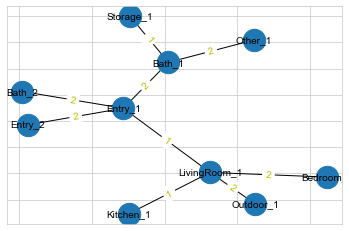

In [134]:
functions.visualize(Gs[0])

In [108]:
for G in Gs:
    for node in G.nodes:
        re_label = node.rstrip('0123456789').replace('_','')
        G.nodes[node]['class'] = re_label

    if nx.number_connected_components(G) > 1:
        G = G.subgraph(max(nx.connected_components(G),key = len))

In [109]:
def draw_Node_Number_Distr(Gs):
    import seaborn as sns
    node_num = np.ndarray(shape=(1,len(Gs)),dtype=int)
    degree_num = np.ndarray(shape=(1,len(Gs)),dtype=int)
    degree_num_2 = np.ndarray(shape=(1,len(Gs)),dtype=int)

    for i in range(len(Gs)):
        node_num[0][i] = len(Gs[i].nodes)
        degree = Gs[i].degree('Entry_1')
        degree_2 = Gs[i].degree('Entry_2')
        if type(degree) == int:
            degree_num[0][i] = degree
        else:
            degree_num[0][i] = 0
        if type(degree_2) == int:
            degree_num_2[0][i] = degree_2
        else:
            degree_num_2[0][i] = 0

    plt.figure(figsize=(16,10), dpi= 80)

    sns.kdeplot(node_num[0],label="edge",alpha=1,color = 'k',linewidth=2.0)


    plt.show()

In [130]:
def draw_degree_Dis(Gs):
    degree = []
    labels=[]
    Entry_num = 0
    for G in Gs:
        for node in G:
            degree.append(G.degree(node))
            if( G.nodes[node]['class'] == 'Entry'):
                Entry_num+=1

    degree_num=[]
    for i in range(1,9):
        labels.append(i)
        de_number = 0
        for number in degree:
            if number == i:
                de_number +=1
        degree_num.append(de_number)


    plt.figure(figsize=(16,10), dpi= 80)
    plt.pie(degree_num,labels = labels,autopct='%.2f%%',labeldistance= 1.1,textprops={'fontsize':18},
            colors=['lightcoral','tomato','coral','gold','yellow','greenyellow','limegreen','springgreen','cyan','royalblue'],
            wedgeprops={'edgecolor':'k',
                        'linestyle':'-',
                        'linewidth':1})
    plt.title('Degree Distribution of all nodes',fontsize = 18)
    plt.savefig("C:\\Users\\HanLi\\Desktop\\Arch_Research\\pic_3_2.jpg")
    plt.show()


In [129]:
def draw_room_dis(Gs):
    room_type = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Entry', 'Garage', 'Other', 'Outdoor']
    room_number = {}
    for  room in room_type:
        room_number[room] = 0
    for G in Gs:
        for node in G:
            room_number[G.nodes[node]['class']] += 1

    room_number_keys = room_number.values()
    explode = (0,0,0,0,0,0,0.1,0,0,0)
    plt.figure(figsize=(16,10), dpi= 80)
    plt.pie(room_number_keys,labels = room_type,autopct='%.2f%%',labeldistance= 1.1,explode = explode,textprops={'fontsize':18},
            colors=['lightcoral','tomato','coral','gold','yellow','greenyellow','limegreen','springgreen','cyan','royalblue'],
            wedgeprops={'edgecolor':'k',
                'linestyle':'-',
                'linewidth':1}
            )
    plt.title('Room Type Distribution',fontsize = 18)
    plt.savefig("C:\\Users\\HanLi\\Desktop\\Arch_Research\\pic_3_1.jpg")
    plt.show()

In [121]:
Gs_1 =[]
for G in Gs:
    if functions.cal_num(G,'Other') <=2 and G.number_of_nodes() >= 4:
        Gs_1.append(G)
print(len(Gs_1))

2468


In [122]:
room_number = {}
for  room in room_type:
    room_number[room] = 0
for G in Gs:
    for node in G:
        room_number[G.nodes[node]['class']] += 1
print(room_number)

{'LivingRoom': 2988, 'Bedroom': 4843, 'Kitchen': 3119, 'Dining': 502, 'Bath': 4241, 'Storage': 3020, 'Entry': 3522, 'Garage': 207, 'Other': 7498, 'Outdoor': 4209}


In [123]:
room_number = {}
for  room in room_type:
    room_number[room] = 0
for G in Gs_1:
    for node in G:
        room_number[G.nodes[node]['class']] += 1
print(room_number)

{'LivingRoom': 2372, 'Bedroom': 3747, 'Kitchen': 2372, 'Dining': 359, 'Bath': 3186, 'Storage': 2146, 'Entry': 2731, 'Garage': 127, 'Other': 2888, 'Outdoor': 2973}


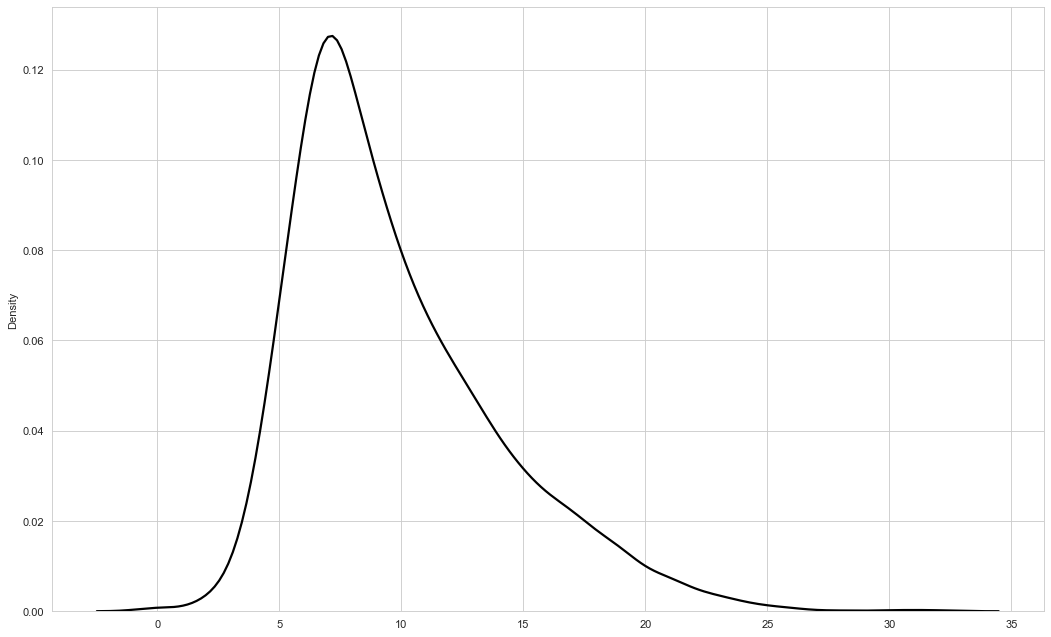

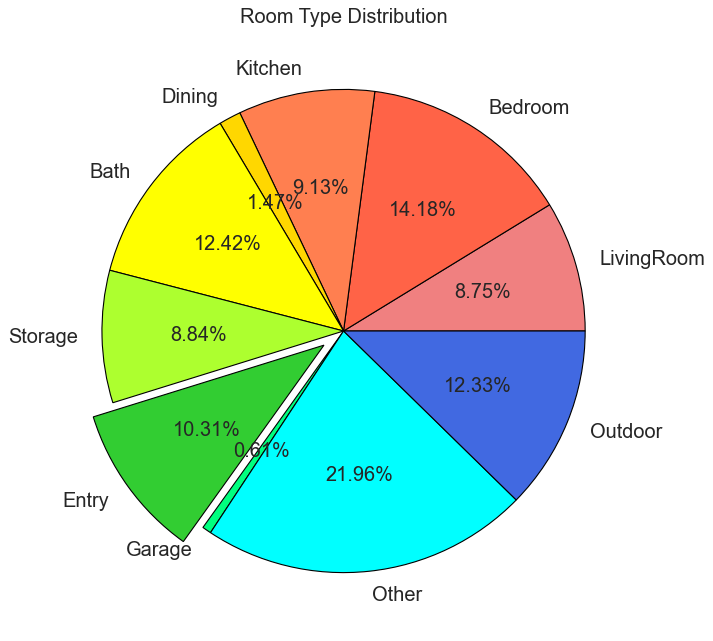

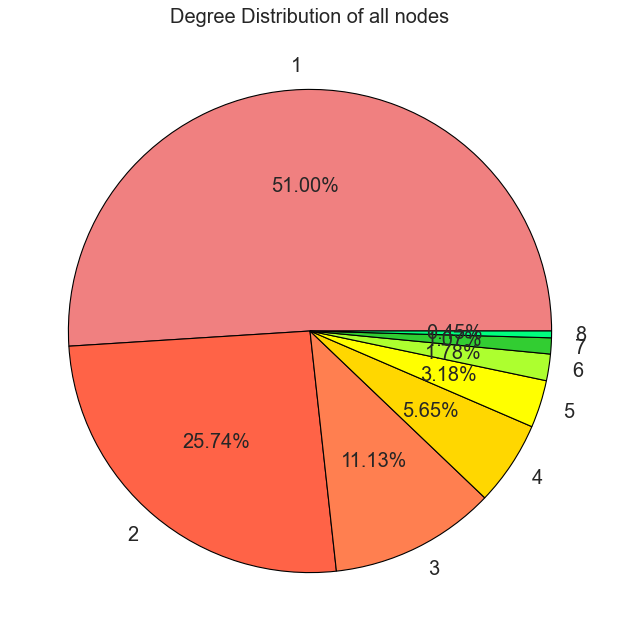

In [124]:
draw_Node_Number_Distr(Gs)
draw_room_dis(Gs)
draw_degree_Dis(Gs)

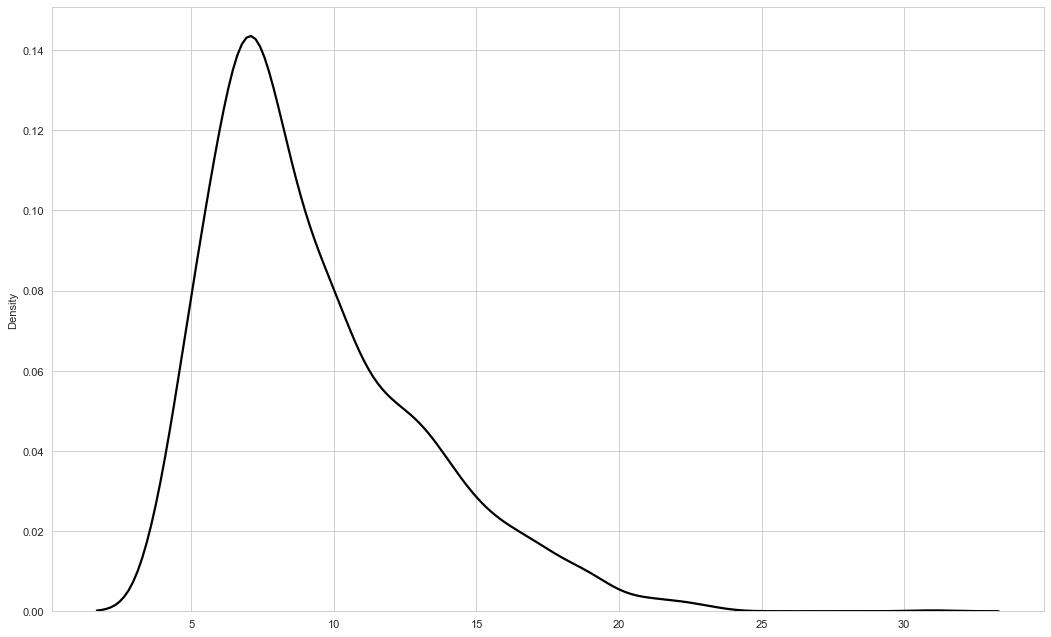

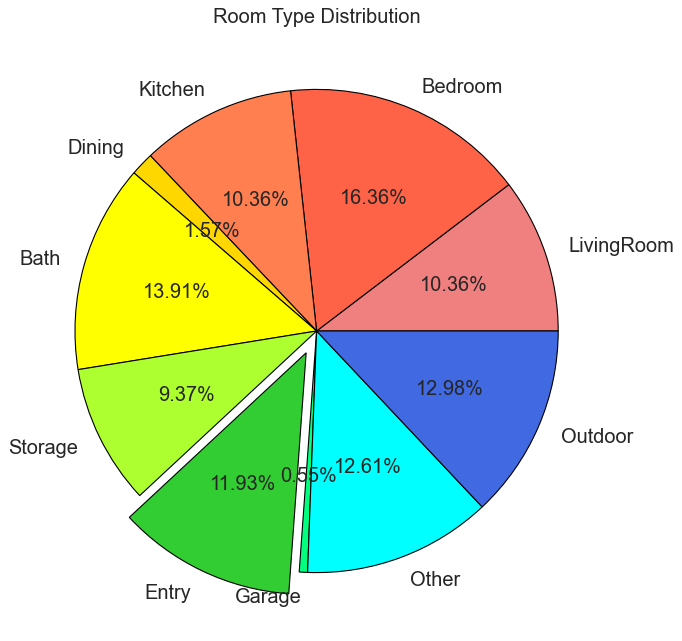

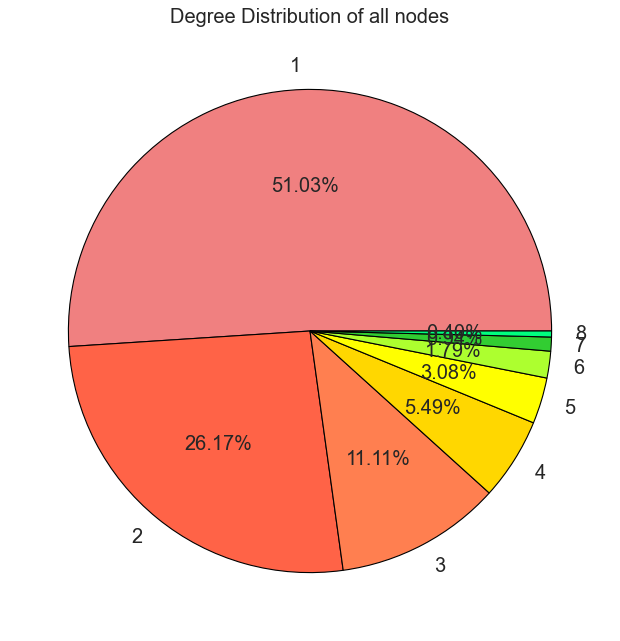

In [127]:
draw_Node_Number_Distr(Gs_1)
draw_room_dis(Gs_1)
draw_degree_Dis(Gs_1)

In [128]:
for G in Gs_1:
    functions.remove(G,'Entry')

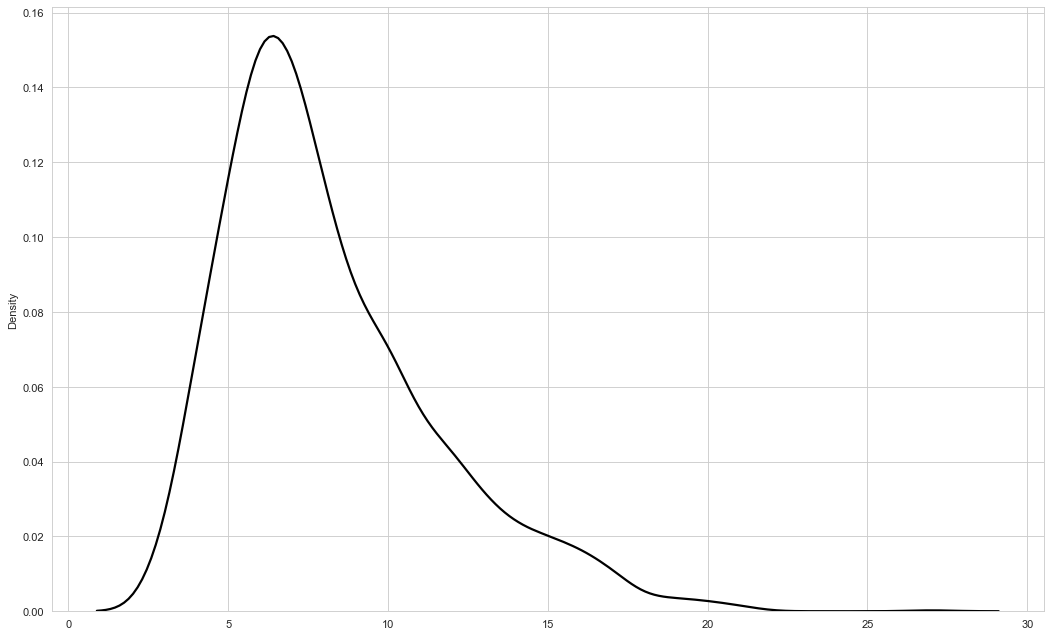

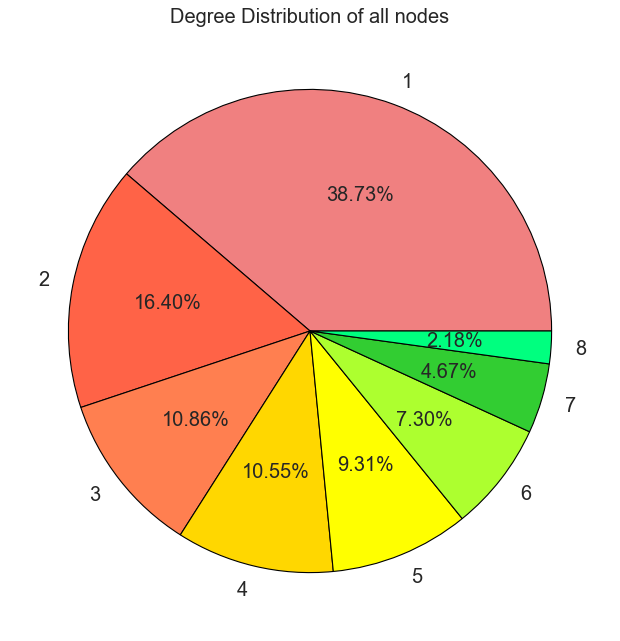

In [131]:
draw_Node_Number_Distr(Gs_1)
draw_degree_Dis(Gs_1)

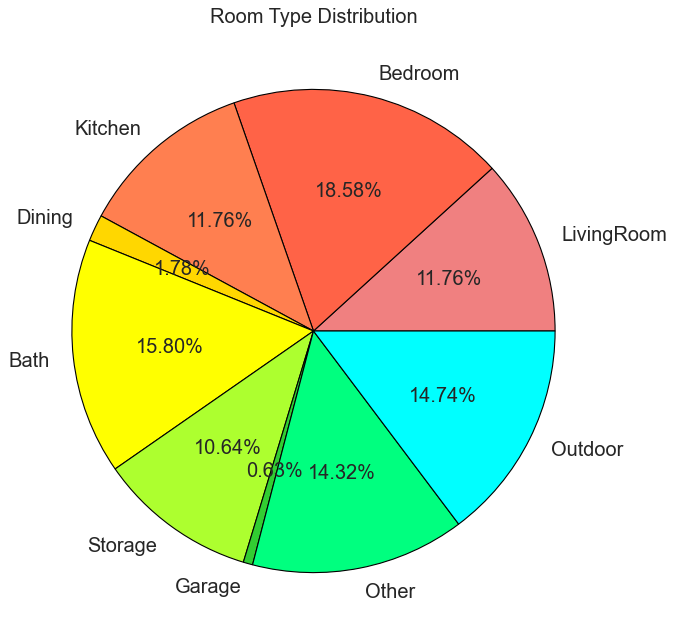

In [132]:
room_type = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Entry', 'Garage', 'Other', 'Outdoor']
room_number = {}
for  room in room_type:
    room_number[room] = 0
for G in Gs_1:
    for node in G:
        room_number[G.nodes[node]['class']] += 1

room_type = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Garage', 'Other', 'Outdoor']
room_number.pop('Entry')
room_number_keys = room_number.values()
explode = (0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(16,10), dpi= 80)
plt.pie(room_number_keys,labels = room_type,autopct='%.2f%%',labeldistance= 1.1,explode = explode,textprops={'fontsize':20},
        colors=['lightcoral','tomato','coral','gold','yellow','greenyellow','limegreen','springgreen','cyan','royalblue'],
        wedgeprops={'edgecolor':'k',
                    'linestyle':'-',
                    'linewidth':1}
        )
plt.title('Room Type Distribution',fontsize = 20)
plt.savefig("C:\\Users\\HanLi\\Desktop\\Arch_Research\\pic_3_3.jpg")
plt.show()


In [15]:
def draw_pos_nega_samples(Gs):
    room_color_map = {'LivingRoom':'#87CEFA', 'Bedroom':'#FFE4C4', 'Kitchen':'#FFE4E1', 'Dining':'#FFDAB9',
                      'Bath':'#FFFACD', 'Storage':'#FFFFF0', 'Entry':'#F0FFFF', 'Garage':'#E6E6FA',
                      'Other':'#FFC0CB', 'Outdoor':'#F0F8FF'}
    room_sequence_type = {'LivingRoom':0, 'Bedroom':2, 'Kitchen':8, 'Dining':6, 'Bath':4, 'Storage':3,
                        'Garage':7, 'Other':1, 'Outdoor':5}

    colors=['lightcyan','bisque','mistyrose','peachpuff','lemonchiffon','ivory','azure','lavender','pink','aliceblue']
    positve_edge=[]
    negative_edge=[]
    for G in Gs:
        for edges in G.edges():
            list =[]
            for edge in edges:
                edge = edge.rstrip('0123456789').replace('_','')
                list.append(edge)
            positve_edge.append(list)
        for edge in nx.non_edges(G):
            list = []
            for edge in edges:
                edge = edge.rstrip('0123456789').replace('_','')
                list.append(edge)
            negative_edge.append(list)

    edge_number_list= [len(positve_edge),len(negative_edge)]
    plt.figure(figsize=(16,10), dpi= 80)
    plt.pie(edge_number_list,labels = ['positive','negative'],autopct='%.2f%%',labeldistance= 1.2,colors=['royalblue','lightcoral'],wedgeprops={'edgecolor':'k','linestyle':'-','linewidth':1})
    plt.title('Positive/Negative Samples')
    plt.show()
    print(len(positve_edge))
    print(len(negative_edge))

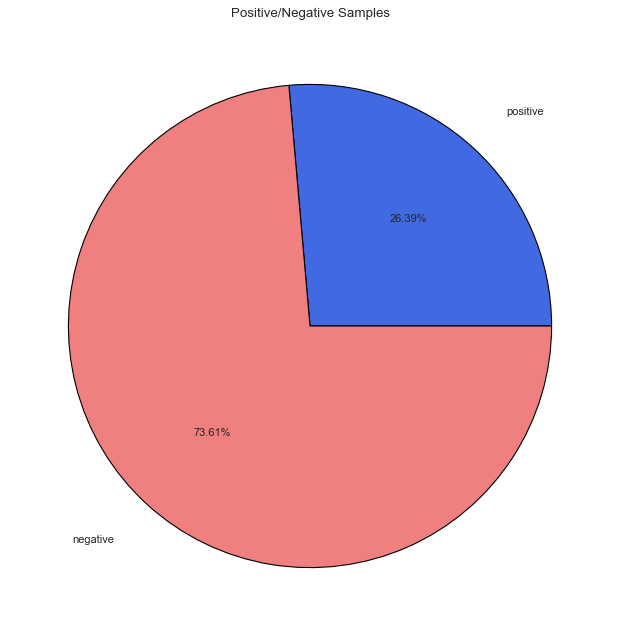

41056
114510
3492


In [16]:
draw_pos_nega_samples(Gs)
print(len(Gs))

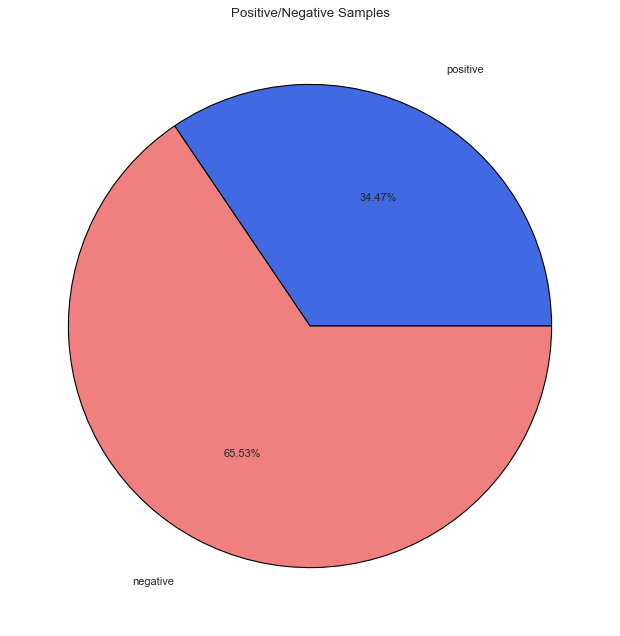

29697
56458
2468


In [17]:
draw_pos_nega_samples(Gs_1)
print(len(Gs_1))

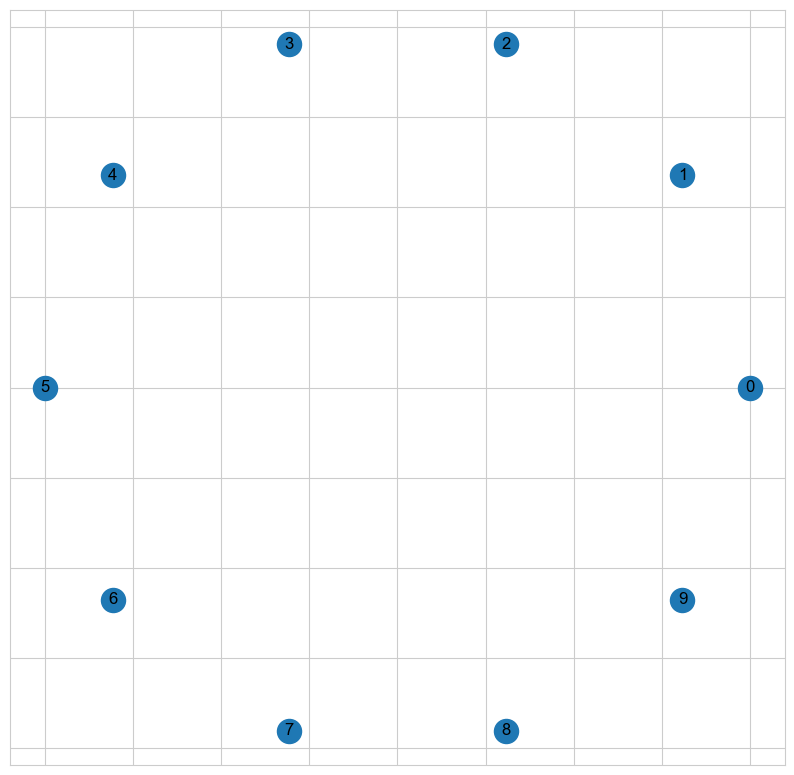

[(0, 1, {'weight': 1}), (1, 2, {'weight': 1}), (1, 6, {'weight': 1}), (1, 7, {'weight': 1}), (2, 3, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 1}), (3, 8, {'weight': 1}), (3, 9, {'weight': 1}), (10, 11, {'weight': 1}), (10, 12, {'weight': 1}), (12, 13, {'weight': 1}), (12, 15, {'weight': 1}), (13, 14, {'weight': 1}), (16, 17, {'weight': 1}), (16, 18, {'weight': 1}), (17, 21, {'weight': 1}), (17, 28, {'weight': 1}), (17, 20, {'weight': 1}), (17, 30, {'weight': 1}), (17, 29, {'weight': 1}), (17, 31, {'weight': 1}), (19, 20, {'weight': 1}), (20, 30, {'weight': 1}), (22, 23, {'weight': 1}), (23, 26, {'weight': 1}), (24, 25, {'weight': 1}), (24, 26, {'weight': 1}), (24, 27, {'weight': 1}), (26, 29, {'weight': 1}), (27, 31, {'weight': 1}), (27, 32, {'weight': 1}), (33, 34, {'weight': 1}), (34, 35, {'weight': 1}), (35, 36, {'weight': 1}), (35, 37, {'weight': 1}), (35, 38, {'weight': 1}), (35, 39, {'weight': 1}), (40, 41, {'weight': 1}), (41, 43, {'weight': 1}), (42, 43, {'weight

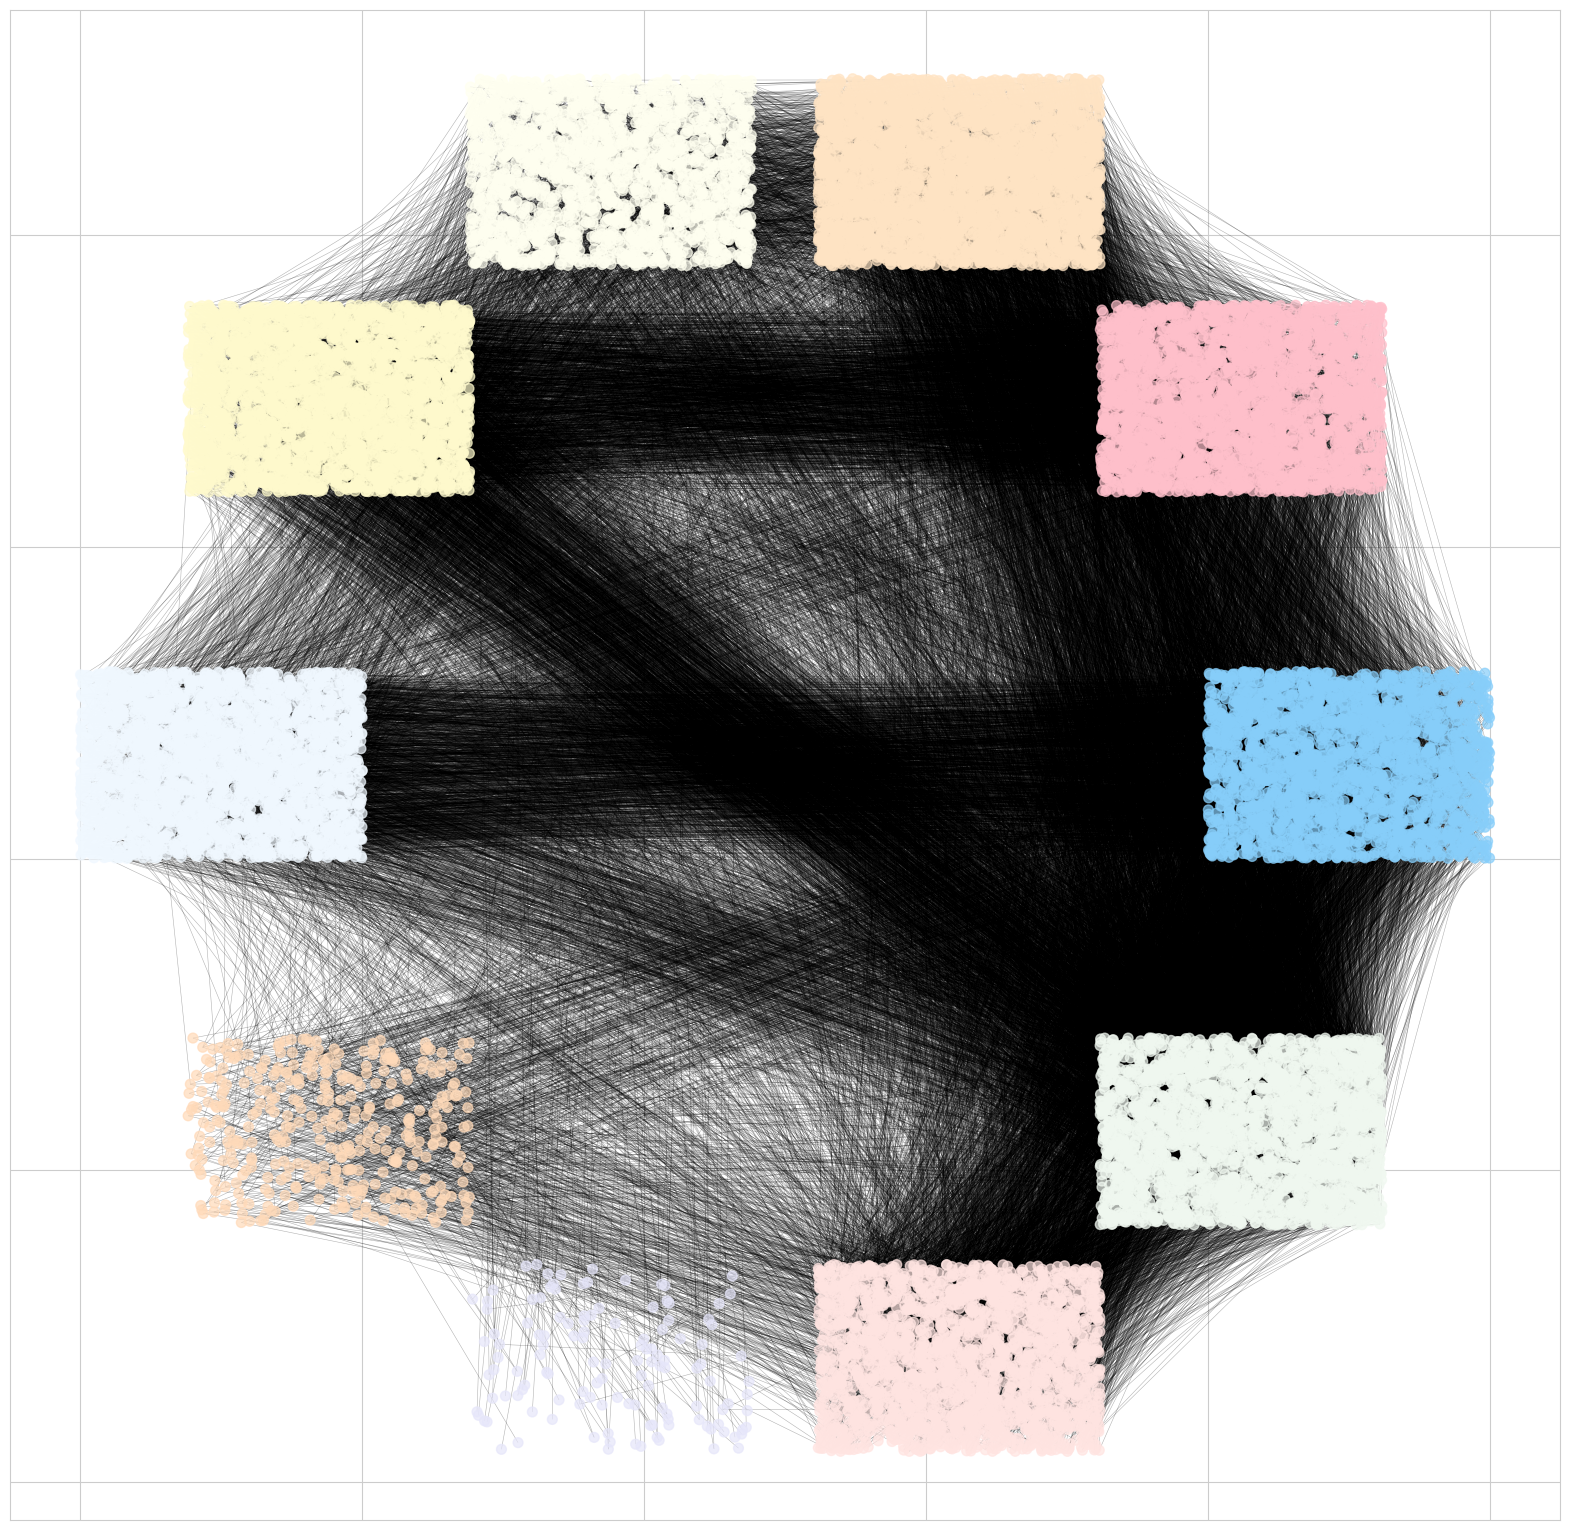

In [105]:
room_color_map = {'LivingRoom':'#87CEFA', 'Bedroom':'#FFE4C4', 'Kitchen':'#FFE4E1', 'Dining':'#FFDAB9',
                      'Bath':'#FFFACD', 'Storage':'#FFFFF0', 'Entry':'#F0FFFF', 'Garage':'#E6E6FA',
                      'Other':'#FFC0CB', 'Outdoor':'#F0F8FF','Entry':'#F0F8F0'}
room_sequence_type = {'LivingRoom':0, 'Bedroom':2, 'Kitchen':8, 'Dining':6, 'Bath':4, 'Storage':3,
                      'Garage':7, 'Other':1, 'Outdoor':5,'Entry':9}
G = nx.Graph()
for i in range(10):
    G.add_node(i)
plt.figure(figsize=(10,10),dpi=100)
ori_pos = nx.circular_layout(G)

pos = nx.circular_layout(G)

nx.draw_networkx_labels(G,pos = pos)
nx.draw_networkx_nodes(G,pos=pos)
plt.show()

Gs_2 = []
for i in range(2468):
    Gs_2.append(Gs_1[i])
G = nx.disjoint_union_all(Gs_2)

nx.set_edge_attributes(G,1, 'weight')
print(G.edges(data = True))

nx.write_gexf(G,"C:\\Users\\HanLi\\Desktop\\Arch_Research\\Graph.gexf")
all_list = []
Living_list=[]
Kitchen_list = []

color = []
for node in G:
    color.append(room_color_map[G.nodes[node]['class']])
pos_ = {}
for node in G:
    pos_[node]= ori_pos[room_sequence_type[G.nodes[node]['class']]]+[0.5*np.random.rand(),0.3*np.random.rand()]

plt.figure(figsize=(20,20),dpi=100)
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos = pos_,nodelist = G.nodes,node_color=color,node_size = 50,alpha=0.7)
nx.draw_networkx_edges(G,pos = pos_,alpha=0.3,width=0.4)
plt.savefig("C:\\Users\\HanLi\\Desktop\\Arch_Research\\pic.jpg")
plt.show()

In [85]:
room_sequence_type = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage','Garage', 'Other', 'Outdoor','Entry']
room_type_list = {}
for room in room_sequence_type:
    room_type_list[room] = []
for node in G.nodes:
    room_type_list[G.nodes[node]['class']].append(node)

list = room_type_list['Bedroom']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['LivingRoom']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Kitchen']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Dining']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Storage']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Garage']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Other']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Outdoor']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Entry']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)

list = room_type_list['Bath']
for value in list:
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            G.add_edge(list[i],list[j],weight= 0.1)
nx.write_gexf(G,"C:\\Users\\HanLi\\Desktop\\Arch_Research\\Graph_2.gexf")

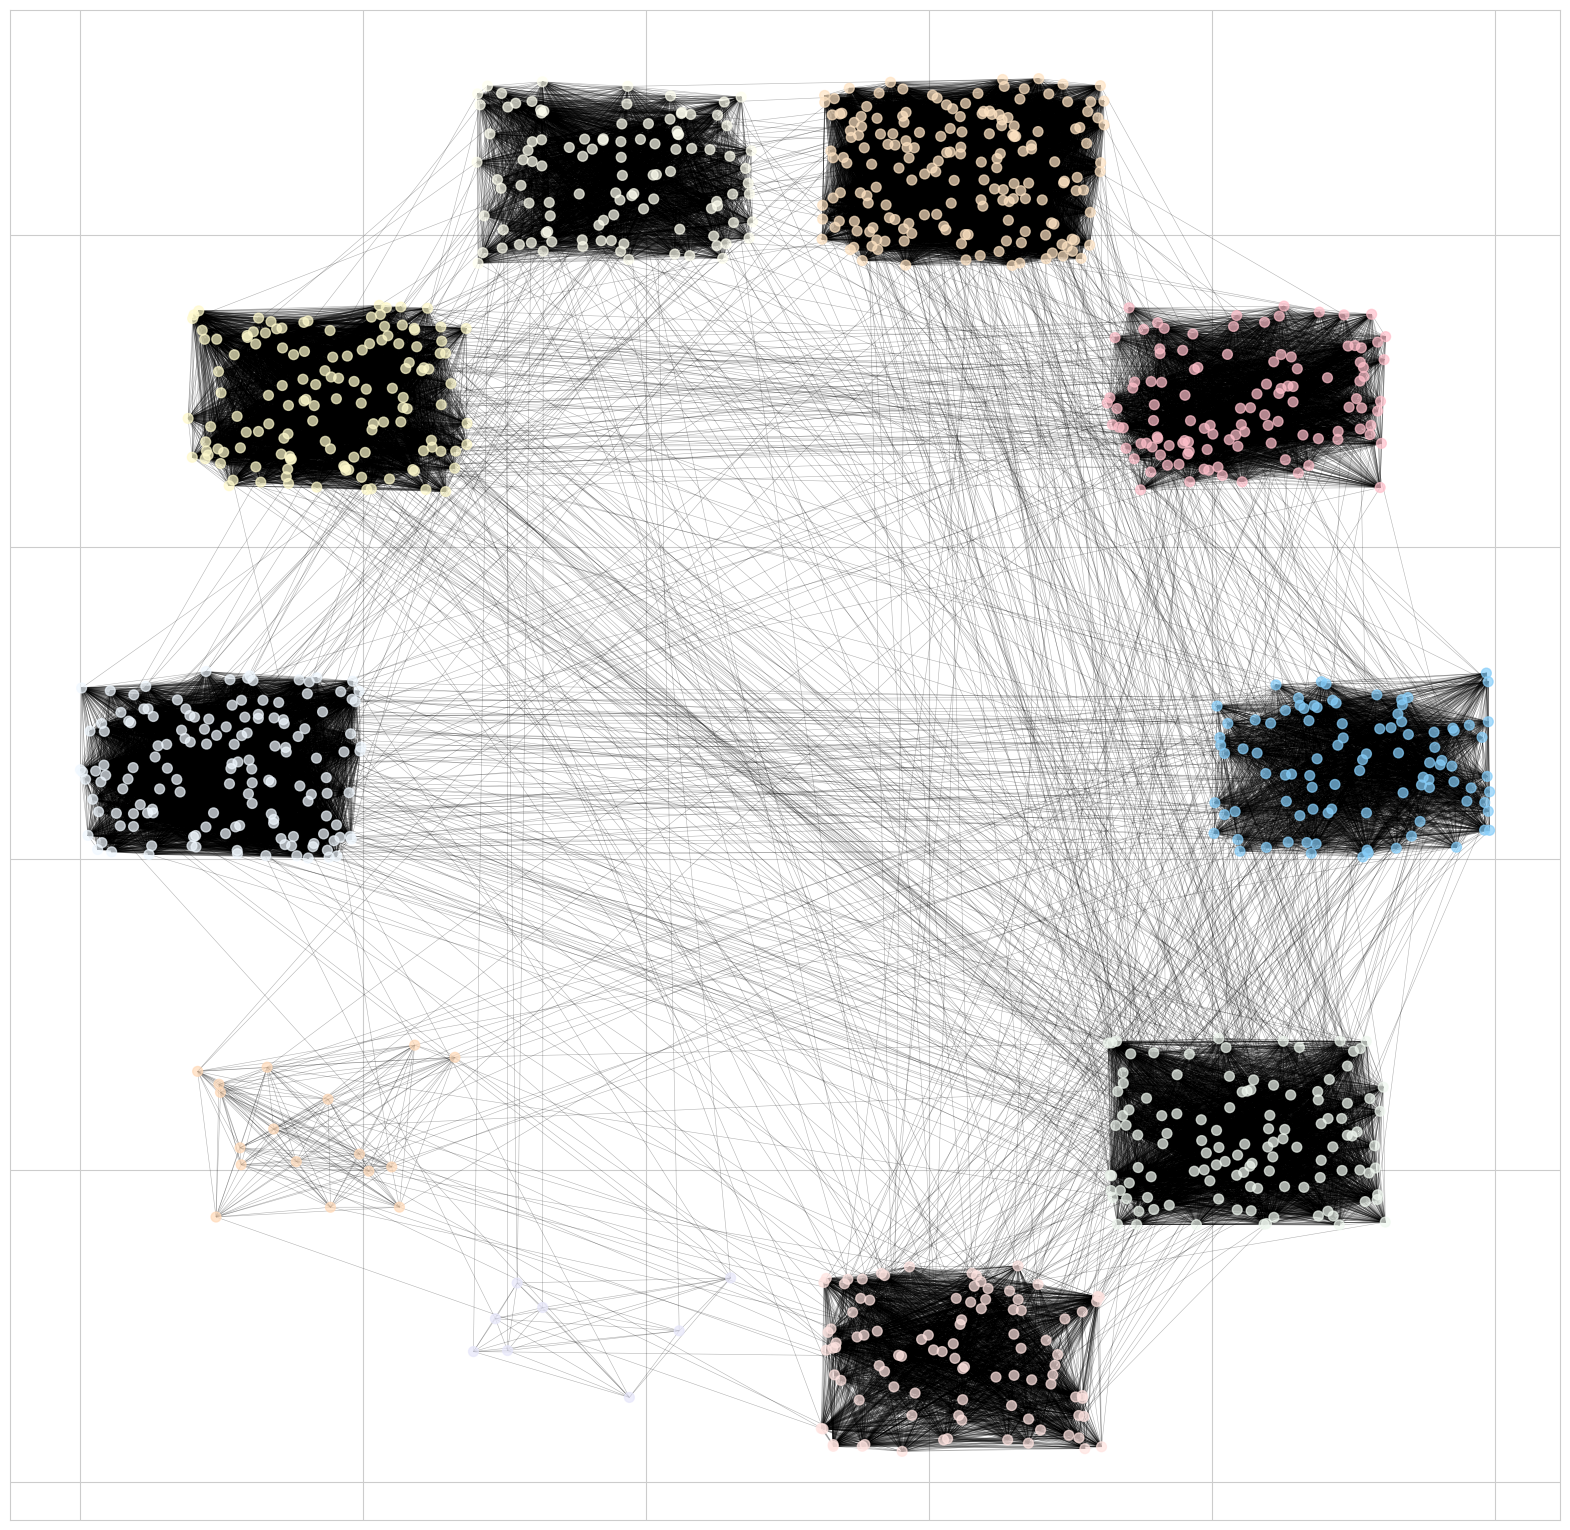

In [81]:
plt.figure(figsize=(20,20),dpi=100)
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos = pos_,nodelist = G.nodes,node_color=color,node_size = 50,alpha=0.7)
nx.draw_networkx_edges(G,pos = pos_,alpha=0.3,width=0.4)
plt.show()

In [19]:
room_type_degree={}
room_type = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Entry', 'Garage', 'Other', 'Outdoor']
for room in room_type:
    room_type_degree[room]=[]
for G in Gs_1:
    for node in G:
        number = 0
        for neighbors in nx.neighbors(G,node):
            number += 1
        room_type_degree[G.nodes[node]['class']].append(number)

list = room_type_degree.values()
mean_list = []
for i in list:
    mean_list.append(np.mean(i))
print(mean_list)


[4.531618887015177, 3.291433146517214, 3.1243676222596966, 3.222841225626741, 3.18706842435656, 2.233923578751165, 8.0, 1.6771653543307086, 2.2475761772853184, 2.046417759838547]


In [20]:
mean_list.remove(8.0)


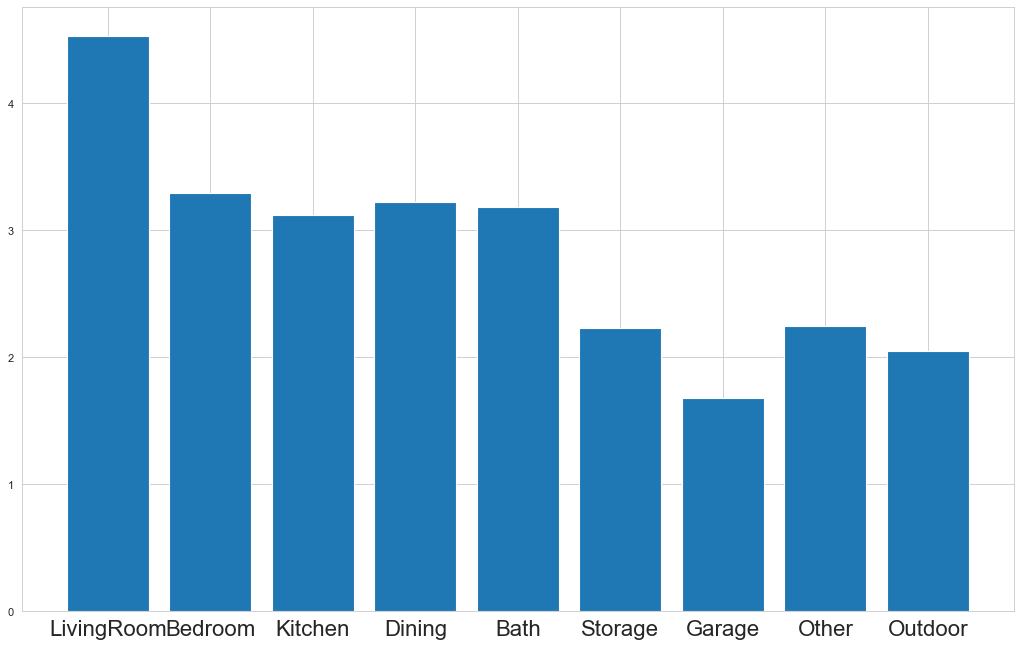

In [21]:
room_type_ = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Garage', 'Other', 'Outdoor']

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(range(len(mean_list)),mean_list, tick_label=room_type_)
plt.xticks(fontsize=20)

plt.show()

In [22]:
number =0
for nei in nx.neighbors(Gs[0],'Kitchen_1'):
    number += 1
print(number)

1
